In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import mlab
from optic.models.amplification import get_spectrum

# Real signal

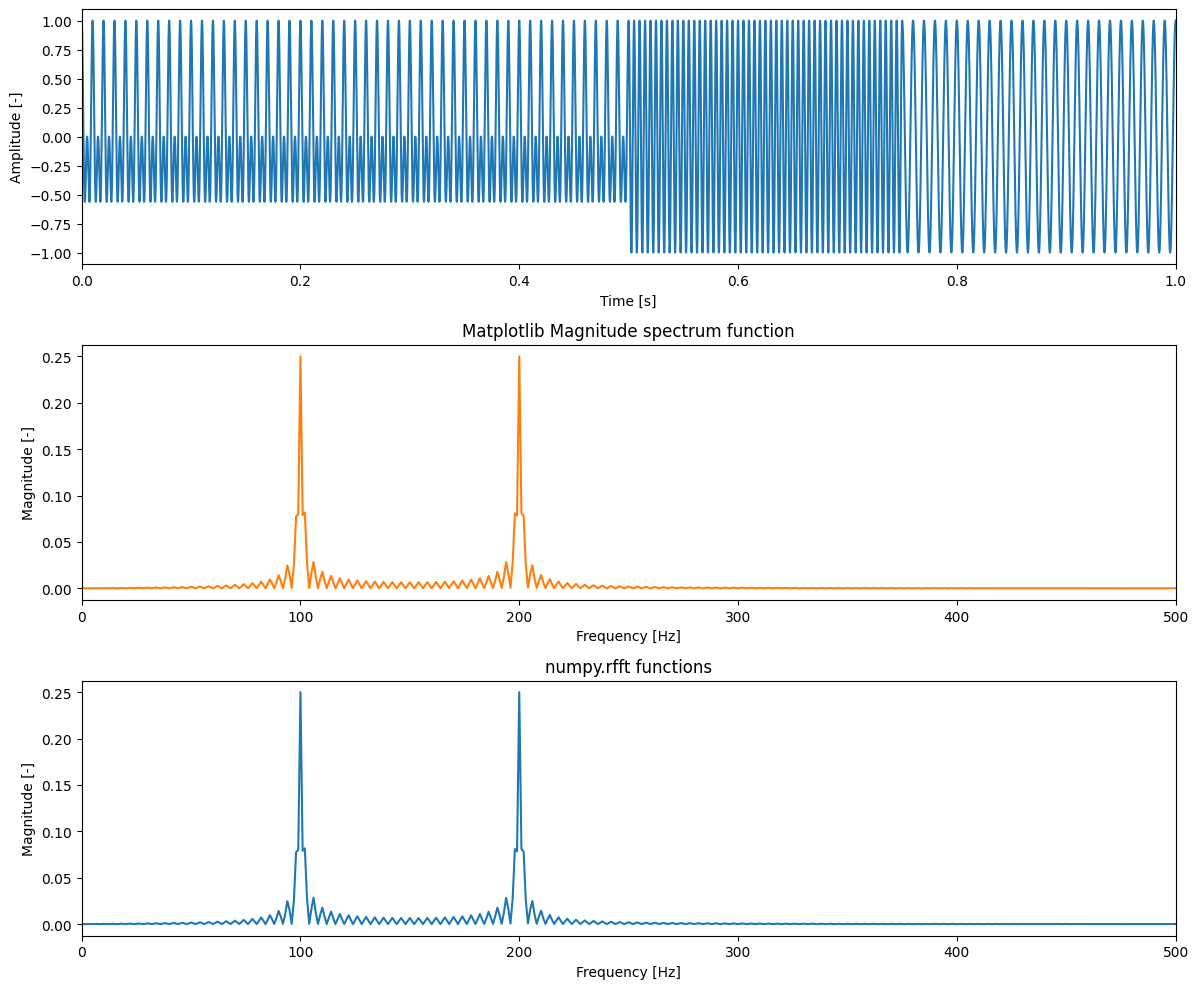

In [2]:
sr = 20000  # samplerate in samp/s
freq1 = 200
freq2 = 100
duration = 1  # in seconds

x = np.linspace(0, duration, sr * duration)
firstsig = 0.5*np.cos(freq1 * 2 * np.pi * x[:10000]) + 0.5*np.cos(freq2 * 2 * np.pi * x[:10000])
secondsig = np.cos(freq1 * 2 * np.pi * x[10000:15000])
thirdsig = np.cos(freq2 * 2 * np.pi * x[15000:20000])
y = np.concatenate([firstsig, secondsig, thirdsig])

fig, ax = plt.subplots(3, 1, figsize=(12, 10))

ax[0].plot(x, y)
ax[0].axis(xmin=0, xmax=1)
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Amplitude [-]')

ax[1].magnitude_spectrum(y, Fs=sr, color='C1', window=mlab.window_none)
ax[1].axis(xmin=0, xmax=500)
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Magnitude [-]')
ax[1].set_title('Matplotlib Magnitude spectrum function')

ax[2].plot(np.fft.rfftfreq(sr*duration, d=1/sr), np.abs(np.fft.rfft(y))/sr)
ax[2].axis(xmin=0, xmax=500)
ax[2].set_xlabel('Frequency [Hz]')
ax[2].set_ylabel('Magnitude [-]')
ax[2].set_title('numpy.rfft functions')

plt.tight_layout()
plt.show()

# Complex signal

c:\Users\Caio\Documents\GitHub\Laser-Study\.venv\lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Caio\Documents\GitHub\Laser-Study\.venv\lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


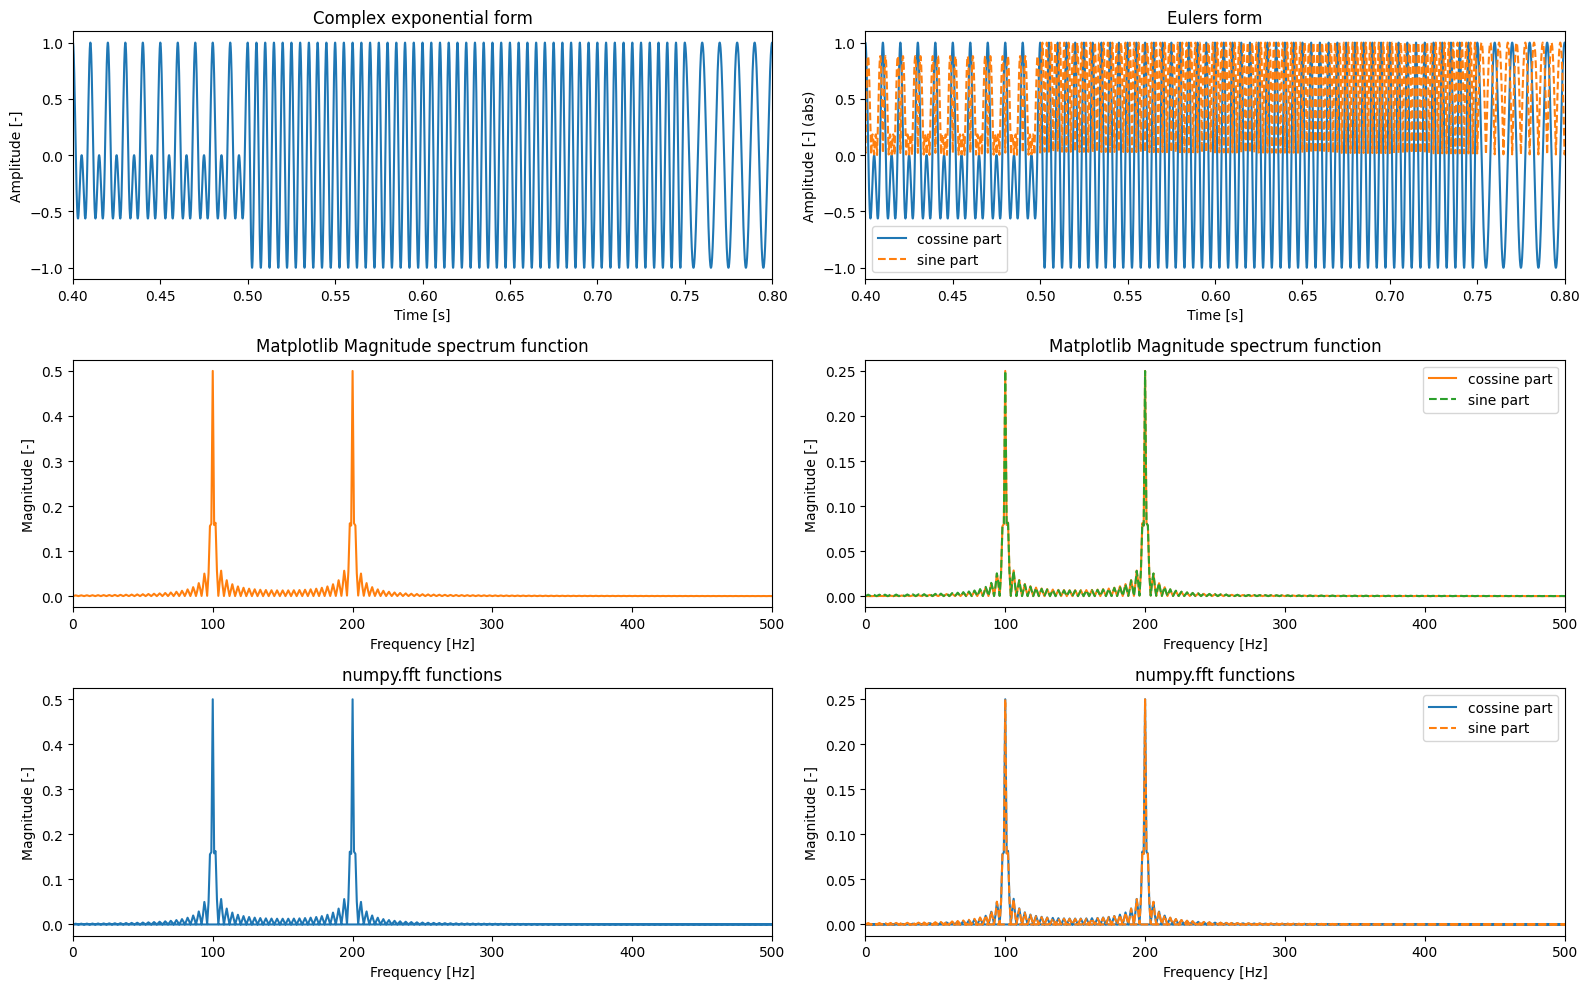

In [3]:
sr = 20000  # samplerate in samp/s
freq1 = 200
freq2 = 100
duration = 1  # in seconds

x = np.linspace(0, duration, sr * duration)
firstsig = 0.5*np.exp(2*np.pi*1j*freq1*x[:10000]) + 0.5*np.exp(2*np.pi*1j*freq2*x[:10000])
secondsig = np.exp(2*np.pi*1j*freq1*x[10000:15000])
thirdsig = np.exp(2*np.pi*1j*freq2*x[15000:20000])

y = np.concatenate([firstsig, secondsig, thirdsig])

firstsigc = 0.5*np.cos(2*np.pi*freq1*x[:10000]) + 0.5*np.cos(2*np.pi*freq2*x[:10000])
secondsigc = np.cos(2*np.pi*freq1*x[10000:15000])
thirdsigc = np.cos(2*np.pi*freq2*x[15000:20000])

firstsigs = 0.5*1j*np.sin(2*np.pi*freq1*x[:10000]) + 0.5*1j*np.sin(2*np.pi*freq2*x[:10000])
secondsigs = 1j*np.sin(2*np.pi*freq1*x[10000:15000])
thirdsigs = 1j*np.sin(2*np.pi*freq2*x[15000:20000])

y2c = np.concatenate([firstsigc, secondsigc, thirdsigc])
y2s = np.concatenate([firstsigs, secondsigs, thirdsigs])

fig, ax = plt.subplots(3, 2, figsize=(16, 10))

ax[0][0].plot(x, y)
ax[0][0].axis(xmin=0.4, xmax=0.8)
ax[0][0].set_xlabel('Time [s]')
ax[0][0].set_ylabel('Amplitude [-]')
ax[0][0].set_title('Complex exponential form')

ax[1][0].magnitude_spectrum(y, Fs=sr, color='C1', window=mlab.window_none)
ax[1][0].axis(xmin=0, xmax=500)
ax[1][0].set_xlabel('Frequency [Hz]')
ax[1][0].set_ylabel('Magnitude [-]')
ax[1][0].set_title('Matplotlib Magnitude spectrum function')

ax[2][0].plot(np.fft.fftfreq(sr*duration, d=1/sr), np.abs(np.fft.fft(y))/sr)
ax[2][0].axis(xmin=0, xmax=500)
ax[2][0].set_xlabel('Frequency [Hz]')
ax[2][0].set_ylabel('Magnitude [-]')
ax[2][0].set_title('numpy.fft functions')

ax[0][1].plot(x, y2c, label='cossine part')
ax[0][1].plot(x, np.abs(y2s), label='sine part', linestyle='--')
ax[0][1].axis(xmin=0.4, xmax=0.8)
ax[0][1].set_xlabel('Time [s]')
ax[0][1].set_ylabel('Amplitude [-] (abs)')
ax[0][1].set_title('Eulers form')
ax[0][1].legend()

ax[1][1].magnitude_spectrum(y2c, Fs=sr, color='C1', window=mlab.window_none, label='cossine part')
ax[1][1].magnitude_spectrum(y2s, Fs=sr, color='C2', window=mlab.window_none, label='sine part', linestyle='--')
ax[1][1].axis(xmin=0, xmax=500)
ax[1][1].set_xlabel('Frequency [Hz]')
ax[1][1].set_ylabel('Magnitude [-]')
ax[1][1].set_title('Matplotlib Magnitude spectrum function')
ax[1][1].legend()

ax[2][1].plot(np.fft.fftfreq(sr*duration, d=1/sr), np.abs(np.fft.fft(y2c))/sr, label='cossine part')
ax[2][1].plot(np.fft.fftfreq(sr*duration, d=1/sr), np.abs(np.fft.fft(y2s))/sr, label='sine part', linestyle='--')
ax[2][1].axis(xmin=0, xmax=500)
ax[2][1].set_xlabel('Frequency [Hz]')
ax[2][1].set_ylabel('Magnitude [-]')
ax[2][1].set_title('numpy.fft functions')
ax[2][1].legend()

plt.tight_layout()
plt.show()

## Clean complex signal (in get_spectrum)

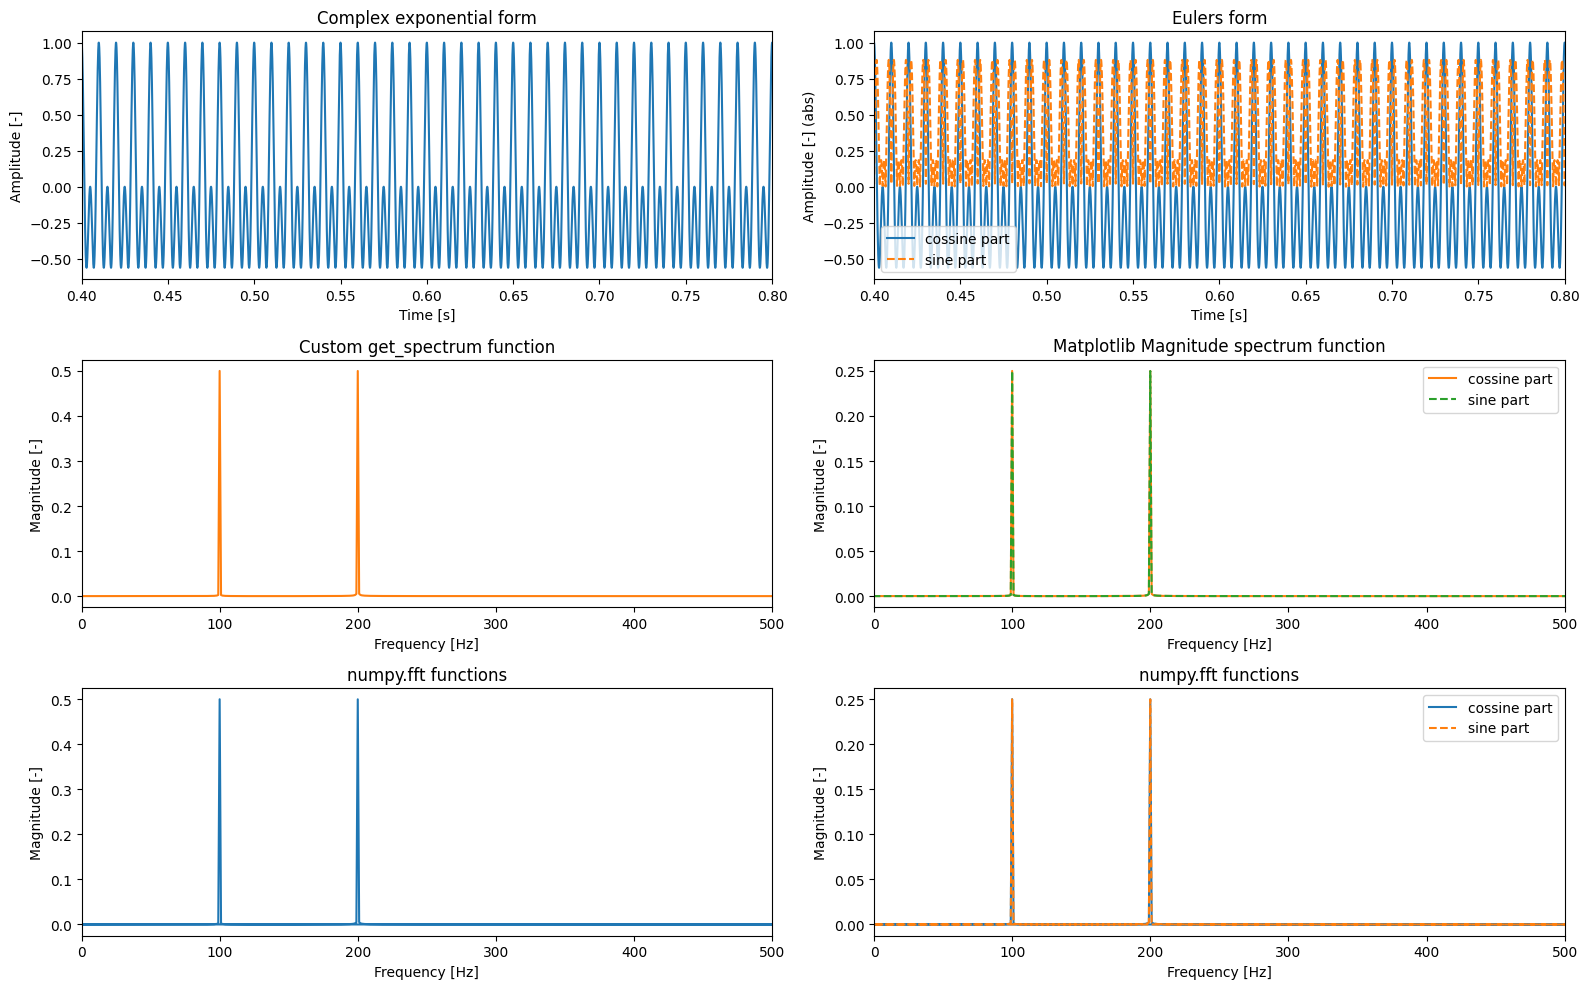

In [27]:
sr = 20000  # samplerate in samp/s
freq1 = 200
freq2 = 100
duration = 1  # in seconds

x = np.linspace(0, duration, sr * duration)
y = 0.5*np.exp(2*np.pi*1j*freq1*x) + 0.5*np.exp(2*np.pi*1j*freq2*x)
y2c = 0.5*np.cos(2*np.pi*freq1*x) + 0.5*np.cos(2*np.pi*freq2*x)
y2s = 0.5*1j*np.sin(2*np.pi*freq1*x) + 0.5*1j*np.sin(2*np.pi*freq2*x)

fig, ax = plt.subplots(3, 2, figsize=(16, 10))

ax[0][0].plot(x, y)
ax[0][0].axis(xmin=0.4, xmax=0.8)
ax[0][0].set_xlabel('Time [s]')
ax[0][0].set_ylabel('Amplitude [-]')
ax[0][0].set_title('Complex exponential form')

spectrum, freq = mlab.magnitude_spectrum(y, Fs=sr, window=mlab.window_none, sides='onesided')

ax[1][0].plot(freq, spectrum, color='C1')
ax[1][0].axis(xmin=0, xmax=500)
ax[1][0].set_xlabel('Frequency [Hz]')
ax[1][0].set_ylabel('Magnitude [-]')
ax[1][0].set_title('Custom get_spectrum function')

ax[2][0].plot(np.fft.fftfreq(sr*duration, d=1/sr), np.abs(np.fft.fft(y))/sr)
ax[2][0].axis(xmin=0, xmax=500)
ax[2][0].set_xlabel('Frequency [Hz]')
ax[2][0].set_ylabel('Magnitude [-]')
ax[2][0].set_title('numpy.fft functions')

ax[0][1].plot(x, y2c, label='cossine part')
ax[0][1].plot(x, np.abs(y2s), label='sine part', linestyle='--')
ax[0][1].axis(xmin=0.4, xmax=0.8)
ax[0][1].set_xlabel('Time [s]')
ax[0][1].set_ylabel('Amplitude [-] (abs)')
ax[0][1].set_title('Eulers form')
ax[0][1].legend()

ax[1][1].magnitude_spectrum(y2c, Fs=sr, color='C1', window=mlab.window_none, label='cossine part')
ax[1][1].magnitude_spectrum(y2s, Fs=sr, color='C2', window=mlab.window_none, label='sine part', linestyle='--')
ax[1][1].axis(xmin=0, xmax=500)
ax[1][1].set_xlabel('Frequency [Hz]')
ax[1][1].set_ylabel('Magnitude [-]')
ax[1][1].set_title('Matplotlib Magnitude spectrum function')
ax[1][1].legend()

ax[2][1].plot(np.fft.fftfreq(sr*duration, d=1/sr), np.abs(np.fft.fft(y2c))/sr, label='cossine part')
ax[2][1].plot(np.fft.fftfreq(sr*duration, d=1/sr), np.abs(np.fft.fft(y2s))/sr, label='sine part', linestyle='--')
ax[2][1].axis(xmin=0, xmax=500)
ax[2][1].set_xlabel('Frequency [Hz]')
ax[2][1].set_ylabel('Magnitude [-]')
ax[2][1].set_title('numpy.fft functions')
ax[2][1].legend()

plt.tight_layout()
plt.show()